# Stock Market Predictions on any specific stock or company

* There are multiple csv files of multiple stocks ini the Nifty Market
* Let's take Nestle India csv for our analysis and prediction

In [31]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Nifty Fifty Master Data/NESTLEIND.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,508.100006,512.549988,505.000000,505.149994,372.676758,7100
1,2002-08-13,503.500000,515.000000,503.500000,509.049988,375.554077,8800
2,2002-08-14,502.100006,515.000000,502.100006,514.400024,379.501068,18700
3,2002-08-15,514.400024,514.400024,514.400024,514.400024,379.501068,0
4,2002-08-16,516.000000,516.849976,510.000000,511.000000,376.992737,9400
...,...,...,...,...,...,...,...
5355,2024-03-01,2596.199951,2616.550049,2582.500000,2601.449951,2601.449951,755728
5356,2024-03-04,2594.899902,2601.100098,2577.399902,2589.100098,2589.100098,634310
5357,2024-03-05,2590.000000,2595.199951,2532.000000,2538.649902,2538.649902,339302
5358,2024-03-06,2540.000000,2566.750000,2508.250000,2533.050049,2533.050049,991640


#### Getting the insights of the Data

In [3]:
df.shape

(5360, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000,5.360000e+03
mean,841.905151,848.839429,834.368172,841.492153,717.280916,3.720388e+05
std,566.988787,572.641708,560.256709,566.524023,582.285391,5.896541e+05
min,229.500000,251.500000,229.500000,248.934998,184.246796,0.000000e+00
25%,527.049988,527.049988,527.049988,527.049988,388.833649,0.000000e+00
50%,527.049988,527.049988,527.049988,527.049988,390.090881,1.907200e+05
75%,1030.761200,1044.178741,1018.336243,1029.418762,836.371033,5.208450e+05
max,2754.000000,2769.300049,2702.405029,2737.239990,2729.535645,1.106746e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5360 non-null   object 
 1   Open       5360 non-null   float64
 2   High       5360 non-null   float64
 3   Low        5360 non-null   float64
 4   Close      5360 non-null   float64
 5   Adj Close  5360 non-null   float64
 6   Volume     5360 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 293.2+ KB


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* There is no NULL or NAN value in the data

In [7]:
df.duplicated().sum()

0

* There are no duplicate values in the data

In [8]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Initialize notebook mode
init_notebook_mode(connected=True)

# Create a trace for the company
fig=go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines'))
fig.layout.update(title_text="Time Series Data",xaxis_rangeslider_visible=True)

# Create the layout


# Show the plot in the notebook
iplot(fig)

In [9]:
df = df.set_index("Date")

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,508.100006,512.549988,505.000000,505.149994,372.676758,7100
2002-08-13,503.500000,515.000000,503.500000,509.049988,375.554077,8800
2002-08-14,502.100006,515.000000,502.100006,514.400024,379.501068,18700
2002-08-15,514.400024,514.400024,514.400024,514.400024,379.501068,0
2002-08-16,516.000000,516.849976,510.000000,511.000000,376.992737,9400


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df=scaler.fit_transform(df)

In [14]:
df = pd.DataFrame(df, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.110358,0.103682,0.111407,0.102968,0.074031,0.000642
1,0.108536,0.104655,0.110801,0.104535,0.075161,0.000795
2,0.107982,0.104655,0.110235,0.106685,0.076712,0.001690
3,0.112854,0.104417,0.115209,0.106685,0.076712,0.000000
4,0.113488,0.105390,0.113429,0.105319,0.075727,0.000849


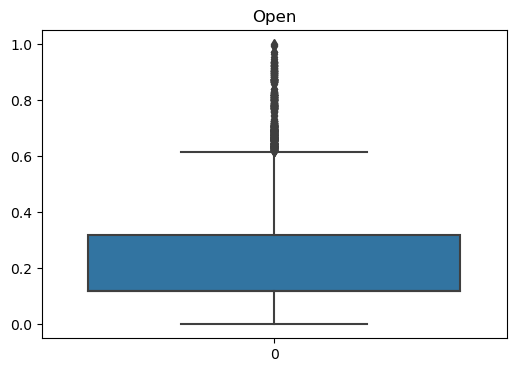

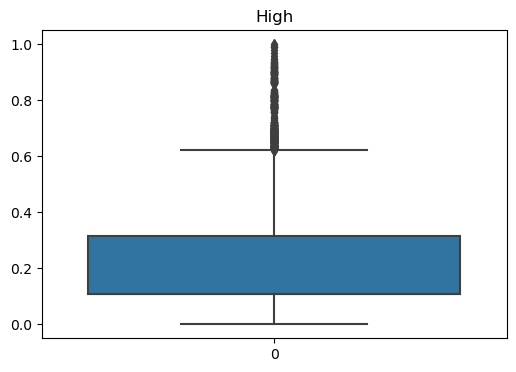

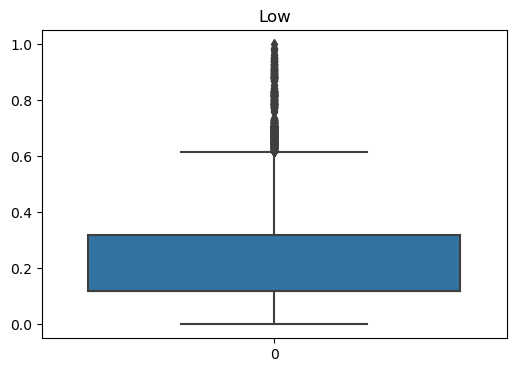

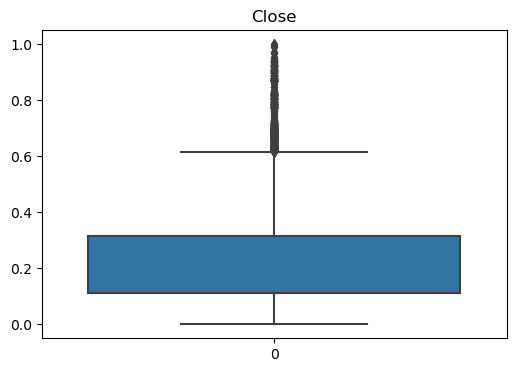

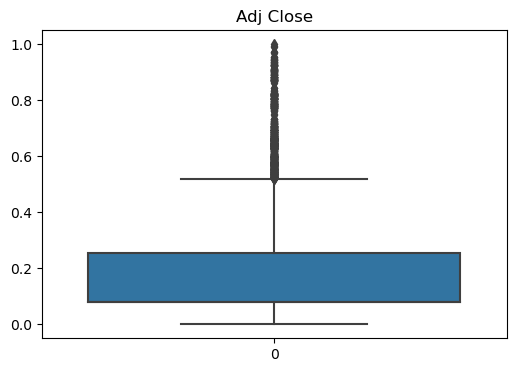

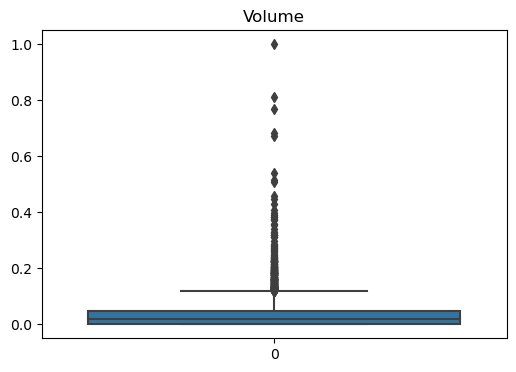

In [16]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show() 

In [17]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1 #Inter Quantile Range
lowerlimit=q1-1.5*IQR
upperlimit=q3+1.5*IQR

In [18]:
filter = (df >= lowerlimit) & (df <= upperlimit )
filter

,Open,High,Low,Close,Adj Close,Volume
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
5355,False,False,False,False,False,True
5356,False,False,False,False,False,True
5357,False,False,False,False,False,True
5358,False,False,False,False,False,True


In [19]:
df1=df[filter.all(axis=1)] 
df1

,Open,High,Low,Close,Adj Close,Volume
0,0.110358,0.103682,0.111407,0.102968,0.074031,0.000642
1,0.108536,0.104655,0.110801,0.104535,0.075161,0.000795
2,0.107982,0.104655,0.110235,0.106685,0.076712,0.001690
3,0.112854,0.104417,0.115209,0.106685,0.076712,0.000000
4,0.113488,0.105390,0.113429,0.105319,0.075727,0.000849
...,...,...,...,...,...,...
4518,0.530996,0.527167,0.536486,0.527001,0.493461,0.045398
4523,0.542486,0.538808,0.544827,0.539327,0.504584,0.102625
4524,0.540107,0.538208,0.546412,0.537559,0.502988,0.066497
4624,0.561414,0.560408,0.561485,0.551054,0.519837,0.087071


In [20]:
from sklearn.model_selection import train_test_split

X=df1.drop('Close',axis=1)
# we have selected the 'Close' column as Target attribute
y=df1['Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(" X_train Shpe :",X_train.shape)
print(" X_test Shpe :",X_test.shape)
print(" y_train Shpe :",y_train.shape)
print(" y_train Shpe :",y_test.shape)

 X_train Shpe : (3442, 5)
 X_test Shpe : (861, 5)
 y_train Shpe : (3442,)
 y_train Shpe : (861,)


In [23]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error,classification_report,accuracy_score
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

# I have used Linear Regression Model
model=LinearRegression()
sfs=SFS(model,
        k_features='best',
        floating=False,
        forward=True  , 
        scoring='neg_mean_squared_error', 
        cv=5)

In [24]:
sfs=sfs.fit(X_train,y_train)
selected_indices=list(sfs.k_feature_idx_)
selected_features=df.columns[selected_indices]

In [25]:
selected_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [26]:
X_train_selected=X_train[['Open', 'High', 'Low']]
X_test_selected=X_test[['Open', 'High', 'Low']]

In [27]:
from sklearn.metrics import mean_squared_error,classification_report,accuracy_score,r2_score
model.fit(X_train_selected,y_train)
y_pred=model.predict(X_test_selected)

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.6674514561263538e-06


In [29]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9998209601704674


In [32]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')

print("Cross-validation R-squared scores:", cv_scores)
print("Mean R-squared score from cross-validation:", np.mean(cv_scores))

Cross-validation R-squared scores: [0.99981212 0.99980768 0.99980787 0.99974066 0.99983429]
Mean R-squared score from cross-validation: 0.9998005261692958
